In [1]:
#Für eine dreiphasige Maschine soll der Lastfluss modelliert werden.
#Das soll ein kurzes Beispiel sein, dass nochmal diese Drehstromformeln nutzt und diese
#in Beziehung setzt zur Summe der einphasigen Lastflüsse.
#Auch da ist dann ein kleiner Vergleich mit weniger effizient und effizienter interessant,
#aber der soll viel kürzer sein als bei den einphasigen Systemen, weil es ja das Gleiche in Grün ist.
#$S = \sqrt{3}UI$

# Elektrische Energie

## python konfigurieren

### Module importieren

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable
from cycler import cycler


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.3
datetime <module 'datetime' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\datetime.py'>
holidays 0.13
seaborn 0.11.2
plotly 5.4.0
sys 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\os.py'>
locale <module 'locale' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\locale.py'>


### Grafikparameter einstellen

In [3]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

In [4]:
# define different color schemes according to:
# https://personal.sron.nl/~pault/#sec:qualitative

BRIGHT = ['#4477aa', '#66ccee', '#228833', '#ccbb44',
          '#ee6677', '#aa3377', '#bbbbbb']

HIGH_CONTRAST = ['#ffffff', '#ddaa33', '#bb5566', '#004488',
                 '#000000']

VIBRANT = ['#0077bb', '#33bbee', '#009988', '#ee7733',
          '#cc3311', '#ee3377', '#bbbbbb']

MUTED = ['#332288', '#88ccee', '#44aa99', '#117733',
         '#999933', '#ddcc77', '#cc6677', '#882255', '#aa4499',
         '#dddddd']

MEDIUM_CONTRAST = ['#ffffff', '#eecc66', '#ee99aa', '#6699cc',
                   '#997700', '#994455', '#004488', '#000000']

LIGHT = ['#77aadd', '#99ddff', '#44bb99', '#bbcc33',
         '#aaaa00', '#eedd88', '#ee8866', '#ffaabb', '#dddddd']

ALL_SCHEMES_KEYS = ['BRIGHT',
               'HIGH_CONTRAST',
               'VIBRANT',
               'MUTED',
               'MEDIUM_CONTRAST',
               'LIGHT']

ALL_SCHEMES_VALS = [BRIGHT,
                    HIGH_CONTRAST,
                    VIBRANT,
                    MUTED,
                    MEDIUM_CONTRAST,
                    LIGHT]

ALL_SCHEMES_DICT = dict(zip(ALL_SCHEMES_KEYS, ALL_SCHEMES_VALS))

def set_colors(scheme):
    if scheme not in ALL_SCHEMES_KEYS:
        raise ValueError(f"scheme not spported yet, needs to be either of\n\
        {[name for name in ALL_SCHEMES_KEYS]}")
    rcParams['axes.prop_cycle'] = cycler('color', ALL_SCHEMES_DICT[scheme])

Das zu verwendende Farbschema, angelehnt an [farbenblindenfreundlichen Farben](https://personal.sron.nl/~pault/#sec:qualitative), kann über eine der oben gelisteten Einstellungen gewählt werden:

In [5]:
set_colors('BRIGHT')

## Einphasig

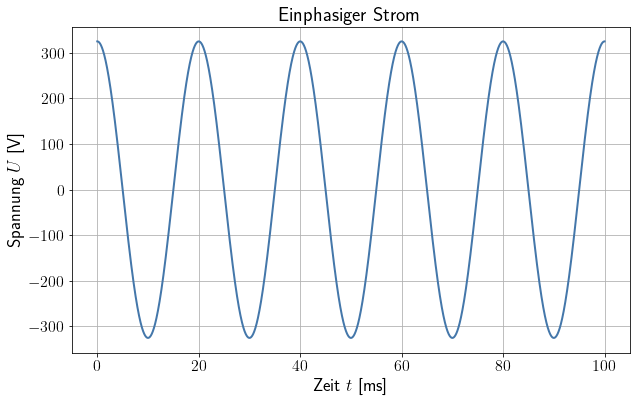

In [6]:
# Spannung im deutschen Stromnetz: Effektivwert 230 V
U = 230 # in Volt
udach = np.sqrt(2)*230 # Amplitude der Spannung
f = 50 # Frequenz in Hertz
# betrachteter Zeitraum
t = np.linspace(0,1e-3*100,5000) # 100 ms
# Spannungssignal ohne Störungen
u1 = udach*np.cos(2*np.pi*f*t)
# Diagramm
plt.plot(1e3*t,u1)
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Spannung $U$ [V]')
plt.title('Einphasiger Strom')
plt.grid()

In [7]:
# ia
I = 1 # in Ampère
i1 = I*np.sqrt(2)*np.cos(2*np.pi*f*t + np.pi/4)

<AxesSubplot:xlabel='t [ms]'>

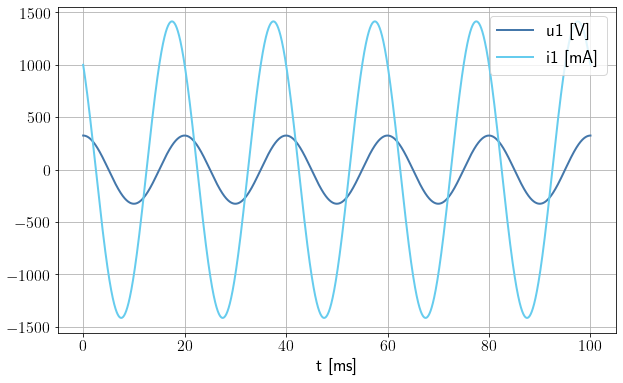

In [8]:
data = np.c_[1e3*t,u1,1e3*i1]
uidf = pd.DataFrame(data = data, columns = ['t [ms]','u1 [V]', 'i1 [mA]'])
uidf.plot(x = 't [ms]', grid = True)

<AxesSubplot:xlabel='t [ms]'>

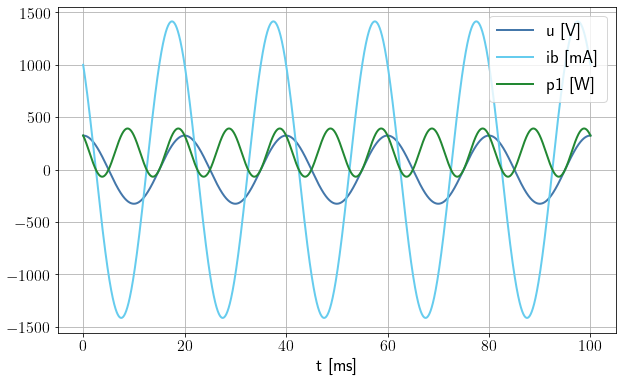

In [9]:
p1 = i1*u1
data = np.c_[1e3*t,u1,1e3*i1,p1]
uidf = pd.DataFrame(data = data, columns = ['t [ms]','u [V]', 'ib [mA]','p1 [W]'])
uidf.plot(x = 't [ms]', grid = True)

#### Einphasige Leistung

\begin{equation}
U_{RMS}= \frac{U_{max}}{\sqrt{2}}
\end{equation}

\begin{equation}
I_{RMS}= \frac{I_{max}}{\sqrt{2}}
\end{equation}

\begin{equation}
P = U_{RMS} \cdot I_{RMS} \cdot \cos\varphi
\end{equation}

or

\begin{equation}
P = \frac{1}{n} \sum_{t=0}^{t=n} U_{t} \cdot I_{t} (5)
\end{equation}

In [10]:
u_rms = u1.max()/np.sqrt(2)
i_rms=i1.max()/np.sqrt(2)
print('Values by formula:',round(u_rms*i_rms*np.cos(np.pi/4),2))
print('Values by addition:',round(p1.mean(),2))

Values by formula: 162.63
Values by addition: 162.67


## Dreiphasig

Text(0.5, 1.0, 'Dreiphasiger Strom')

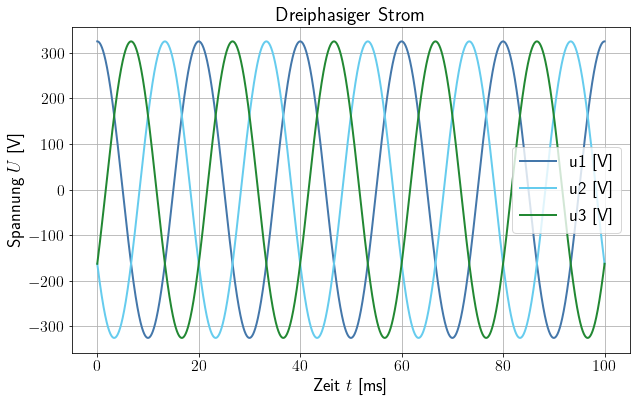

In [11]:
#Neue V Phasen
u2 = udach*np.cos(2*np.pi*f*t + 2*np.pi*(1/3))
u3 = udach*np.cos(2*np.pi*f*t + 2*np.pi*(2/3))

# Diagramm
data = np.c_[1e3*t,u1,u2,u3]
uidf = pd.DataFrame(data = data, columns = ['t [ms]','u1 [V]', 'u2 [V]','u3 [V]'])
uidf.plot(x = 't [ms]', grid = True)
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Spannung $U$ [V]')
plt.title('Dreiphasiger Strom')

Text(0.5, 1.0, 'Dreiphasiger Strom')

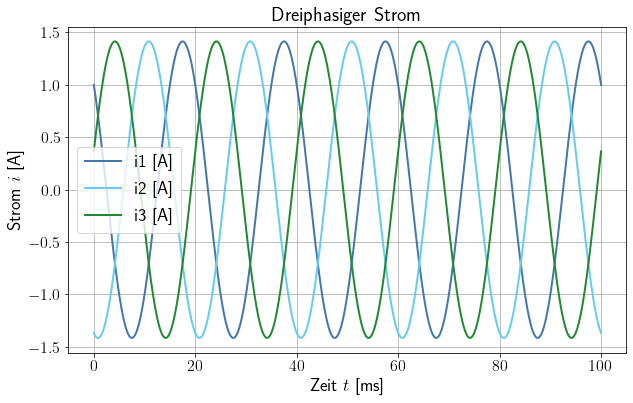

In [12]:
# Neue I Phasen
i2 = I*np.sqrt(2)*np.cos(2*np.pi*f*t + np.pi/4 + 2*np.pi*(1/3))
i3 = I*np.sqrt(2)*np.cos(2*np.pi*f*t + np.pi/4 + 2*np.pi*(2/3))

# Diagramm
data = np.c_[1e3*t,i1,i2,i3]
uidf = pd.DataFrame(data = data, columns = ['t [ms]','i1 [A]', 'i2 [A]', 'i3 [A]'])
uidf.plot(x = 't [ms]', grid = True)
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Strom $i$ [A]')
plt.title('Dreiphasiger Strom')


Text(0.5, 1.0, 'Dreiphasiger Strom')

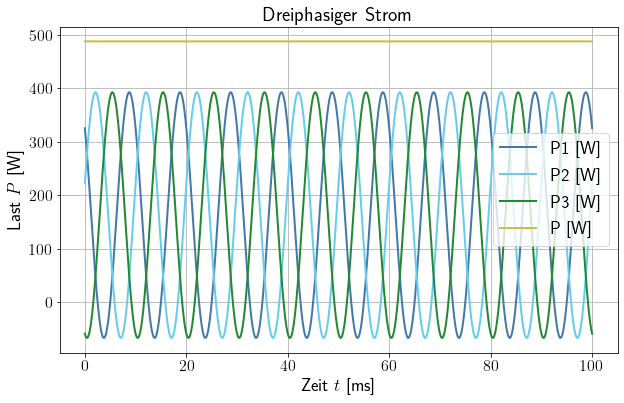

In [13]:
#Neue P Phasen
p2 = u2*i2
p3 = u3*i3
p = p1 + p2 + p3

# Diagramm
data = np.c_[1e3*t,p1,p2,p3,p]
uidf = pd.DataFrame(data = data, columns = ['t [ms]', 'P1 [W]', 'P2 [W]', 'P3 [W]', 'P [W]'])
uidf.plot(x = 't [ms]', grid = True)
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Last $P$ [W]')
plt.title('Dreiphasiger Strom')

#### Dreiphasige Leistung

In [14]:
print('Values by formula:',round(u_rms*i_rms*np.cos(np.pi/4)*3,2))
print('Values by addition:',round(p.mean(),2))

Values by formula: 487.9
Values by addition: 487.9
